## Run the following code to download the MNIST dataset (For numpy based task)


In [ ]:
import numpy as np
from urllib import request
import gzip
import pickle

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

def init():
    download_mnist()
    save_mnist()
#    print ((load()[0]).shape)
def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

if __name__ == '__main__':
    init()

Download complete.
Save complete.


## A2 The load() function will return the training and test dataset

In [ ]:
import numpy as np
from urllib import request
import gzip
import math
import pickle


def grad_softmax_crossentropy(X, y):
    m = y.shape[0]
    ones_for_answers = np.zeros_like(X)
    ones_for_answers[np.arange(len(X)), y] = 1

    p = np.exp(X) / np.exp(X).sum(axis=-1, keepdims=True)
    return (- ones_for_answers + p) / m

def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)

        training_images, training_labels, testing_images, testing_labels = mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]
        # Normalize the images
        training_images.astype('float32')
        testing_images.astype('float32')
        training_images = training_images / 255
        testing_images = testing_images / 255
        return training_images, training_labels, testing_images, testing_labels

'''==============================================
TRimg training image,
TRlab traing labels,
TSimg testing image,
TSlab testing label
================================================'''
TRimg,TRlab,TSimg,TSlab=load()
print(len(TRimg),len(TRlab),len(TSimg),len(TSlab))
print(len(TRimg[0]),len(TRlab),len(TSimg[0]),len(TSlab))

arr_2d = np. reshape(TRimg[0], (28, 28))

60000 60000 10000 10000
784 60000 784 10000


In [ ]:
print(TRimg.shape)
Batch=TRimg[0:32]
print(Batch.shape)

(60000, 784)
(32, 784)


## Run the following code to see what the data looks like.

6


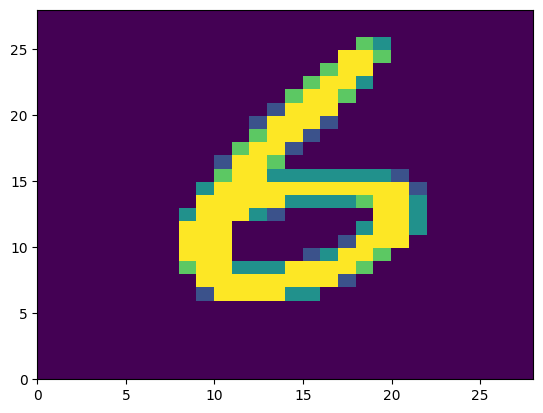

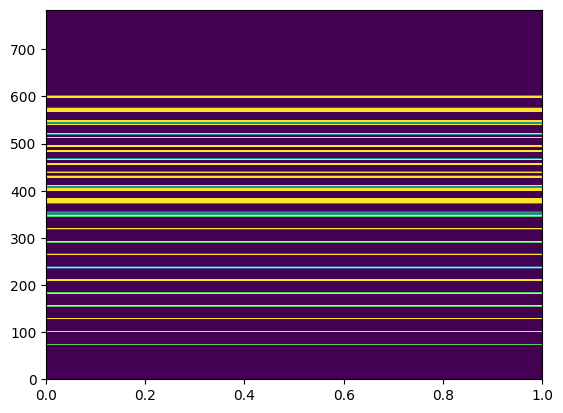

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

showInd=66
Column=np.reshape(TRimg[showInd], (784, 1))
arr_2d = np.reshape(TRimg[showInd], (28, 28))
arr_2dT=np.rot90(arr_2d)
arr_2dTA=np.rot90(arr_2dT)
Final=np.fliplr(arr_2dTA)
#arr_2dTA=np.transpose(arr_2dT)
#arr_2dTB=np.transpose(arr_2dTA)
plt.pcolor(Final)
print(TRlab[showInd])
plt.show()

plt.pcolor(Column)
plt.show()

#pcm = plt.pcolormesh(arr_2d,cmap='RdBu_r')
#plt.colorbar(pcm)
#plt.show()

# Designing the 3-layer neural network:

## Model structure

2 hidden layers:

- 200 neurons in the first hidden layer (connected to the input layer).

- 50 neurons in the second hidden layer (connected to the output layer).

## Pay attention to "epoch" & "batch size".


We will need to divide the data into small groups (batch). Every time we can only process one group.


# ------------------ Model Design --------------------
## Based on my knowledge of a 2-layer network, for a 3-layer network I am going to use to following model:
## softmax(Relu(Relu(y=x*w+b) * w2 + b2) * w3 + b3)

In [ ]:
X_train, y_train, X_test, y_test = load() # Loading data
# preprocess some of the data
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Using the model above, I am going to first initialize
# the parameters:
#X= ----> 2-d array
#Y= ----> 1-d array
D= X_train.shape[1] #----> number of inputs
#print(D)
K= y_train.shape[1] #----> number of outputs
#print(K)
hidden1=200 # ----> number of hidden layers in first layer
hidden2=50 # ----> number of hidden layers in second layer

W1 = 0.01 * np.random.randn(D, hidden1)
b1 = np.zeros((1, hidden1))
W2 = 0.01 * np.random.randn(hidden1, hidden2)
b2 = np.zeros((1, hidden2))
W3 = 0.01 * np.random.randn(hidden2, K)
b3 = np.zeros((1, K))


# ------------------ Training Model --------------------

In [ ]:
# Training the model
# Setting the hyperparameters
step_size = 1e-1
reg = 1e-3
num_examples = X_train.shape[0]
batch_size = 256  # increased batch size
num_epochs = 10
num_batches = num_examples // batch_size

for epoch in range(num_epochs):
    for batch in range(num_batches):
        # Getting the Batch(s)
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        X_batch = X_train[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]

        # Forward propagation
        h1 = np.dot(X_batch, W1) + b1
        h2 = np.maximum(0, h1)
        h3 = np.dot(h2, W2) + b2
        h4 = np.maximum(0, h3)
        h5 = np.dot(h4, W3) + b3
        exp_scores = np.exp(h5)
        s = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Loss Computation
        l1_all = -np.log(s[range(batch_size), np.argmax(y_batch, axis=1)])
        l1 = np.sum(l1_all) / batch_size
        l2 = np.sum(W1*W1) + np.sum(W2*W2) + np.sum(W3*W3)
        l3 = reg * l2
        loss = l1 + l3

        # Backpropagation
        s[range(batch_size), np.argmax(y_batch, axis=1)] -= 1
        ds = s / batch_size
        dh5 = ds
        db3 = np.sum(dh5, axis=0, keepdims=True)
        dW3 = np.dot(h4.T, dh5)
        dh4 = np.dot(dh5, W3.T)
        dh3 = dh4
        dh3[h3 <= 0] = 0
        db2 = np.sum(dh3, axis=0, keepdims=True)
        dW2 = np.dot(h2.T, dh3)
        dh2 = np.dot(dh3, W2.T)
        dh1 = dh2
        dh1[h1 <= 0] = 0
        db1 = np.sum(dh1, axis=0, keepdims=True)
        dW1 = np.dot(X_batch.T, dh1)

        # Regularization addition
        dW1 += 2 * reg * W1
        dW2 += 2 * reg * W2
        dW3 += 2 * reg * W3

        # Updating parameters
        W1 += -step_size * dW1
        b1 += -step_size * db1
        W2 += -step_size * dW2
        b2 += -step_size * db2
        W3 += -step_size * dW3
        b3 += -step_size * db3

    # Printing the loss after each Epoch
    print("Epoch {}: loss {}".format(epoch+1, loss))

Epoch 1: loss 0.23988627559345696
Epoch 2: loss 0.23844566864852315
Epoch 3: loss 0.23704500188460015
Epoch 4: loss 0.23572305021775797
Epoch 5: loss 0.23432536943758803
Epoch 6: loss 0.23292625407460615
Epoch 7: loss 0.23191692979945477
Epoch 8: loss 0.23107783526023096
Epoch 9: loss 0.23014116473280566
Epoch 10: loss 0.22930636863364573


# ------------------ Testing Model --------------------

In [ ]:
# testing
h1 = np.dot(X_train, W1) + b1
h2 = np.maximum(0, h1)
h3 = np.dot(h2, W2) + b2
h4 = np.maximum(0, h3)
h5 = np.dot(h4, W3) + b3
exp_scores = np.exp(h5)
s = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
predicted_class = np.argmax(s, axis=1)
# Training accuracy test:
accuracy = np.mean(predicted_class == np.argmax(y_train, axis=1))
print("Training accuracy after epoch {}: {}".format(epoch+1, accuracy))

Training accuracy after epoch 10: 0.9811833333333333


Predicted class: 6


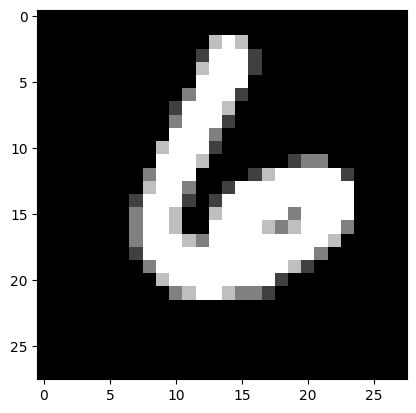

Predicted class: 3


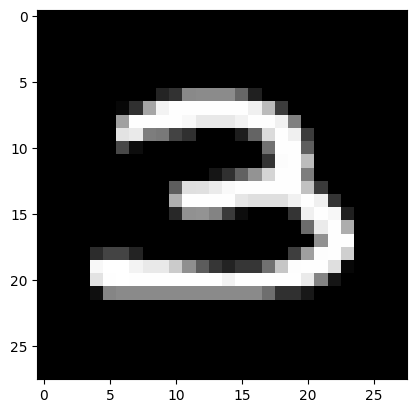

Predicted class: 9


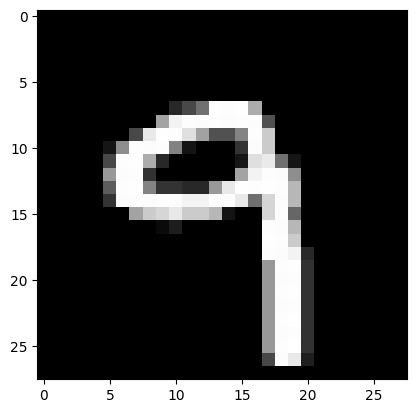

Predicted class: 6


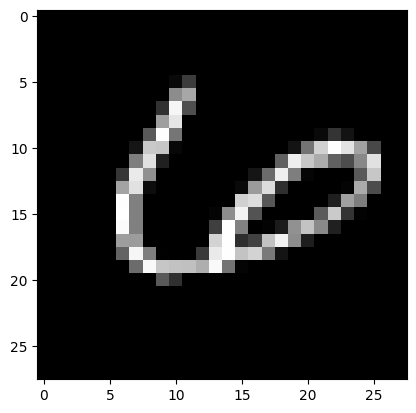

Predicted class: 4


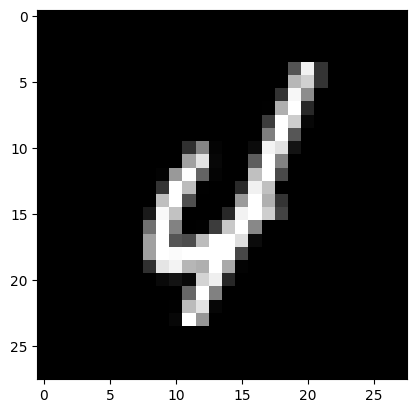

Predicted class: 6


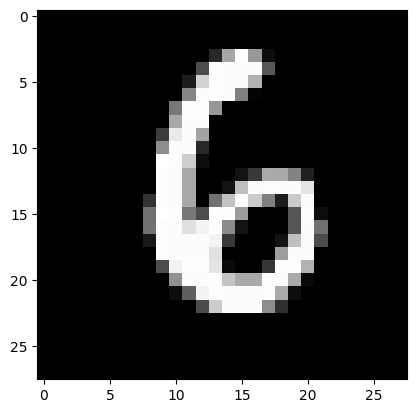

Predicted class: 2


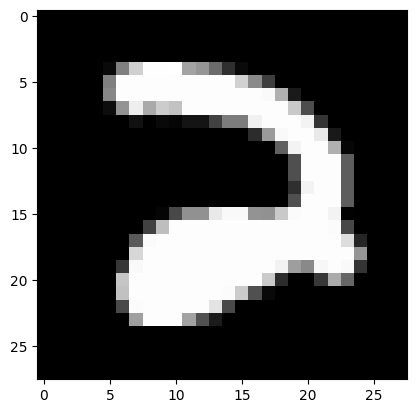

Predicted class: 1


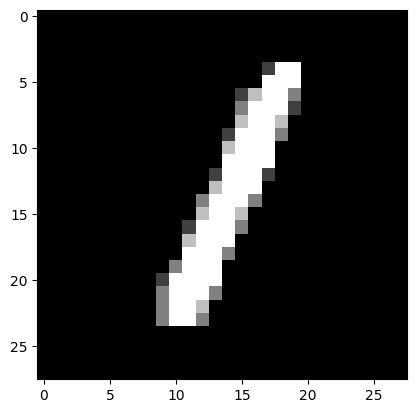

Predicted class: 2


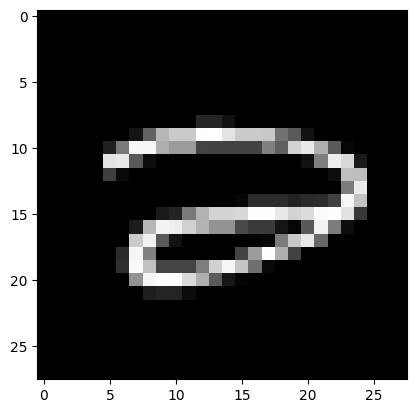

Predicted class: 9


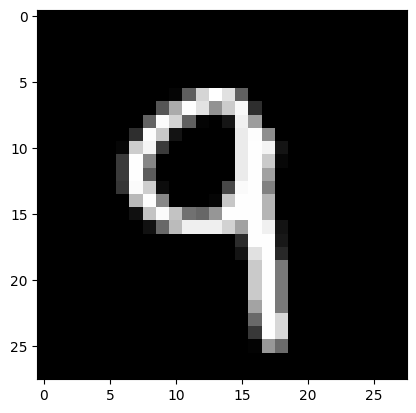

In [ ]:
# Testing
import random
h1 = np.dot(TRimg, W1) + b1
h2 = np.maximum(0, h1)
h3 = np.dot(h2, W2) + b2
h4 = np.maximum(0, h3)
h5 = np.dot(h4, W3) + b3
predicted_classes = np.argmax(h5, axis=1)

# Printing the predicted classes and some images
# to classify.
# print(predicted_classes)
num_samples = 10
indices = random.sample(range(TRimg.shape[0]), num_samples)
for i in indices:
    image = TRimg[i].reshape(28, 28)
    predicted_class = predicted_classes[i]
    print(f"Predicted class: {predicted_class}")
    plt.imshow(image, cmap='gray')
    plt.show()

## Author
-> Isela Juarez-Cendejas <-